##### Name:
John Hemmer

# Climate Model

The EBM is the first model to capture latitudinal dependence; here we use it to shortwave and longwave radiation as well as potential ice latitude. What is modeled first is standard atmospheric conditions, then atmospheric conditions with a derived value of OLR based on the data that was web scraped.

## Derived equation for the one-dimensional EBM with diffusive heat transport:

$$ C \frac{\partial T}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right) $$


The following parameter values
give a reasonable fit to the observed annual mean temperature and energy budget:

- $ A = 210 ~ \text{W m}^{-2}$ (emission at 0$^\circ$C)
- $ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $ (increase in emission per degree, related to net longwave climate feedback)
- $ D = 0.6 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $ (thermal diffusivity of the climate system)

Looked at the adjustment of this model to equilibrium, with annual mean insolation $\overline{Q(\phi)}$ and specified albedo $\alpha(\phi)$ (giving a reasonable fit to observations).

Tuned the diffuvisity $D$ so that the annual mean solution has a reasonable pole-to-equator temperature gradient and peak poleward heat transport.

Actually for the new version of this model with interactive ice line, the diffusivity will be reduced down to $ D = 0.55 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $.



## Interactive snow/ice line in the EBM
____________

The idea is simply that, as the climate gets warmer, the snow and ice will retreat poleward, and the planetary albedo will decrease (or vice-versa).

This is modeled in the zero dimensional model by using a quadratic ramp function for the global mean albedo as a function of global mean temperature. Here, since the model resolves temperature at each latitude, we want to do something more physical:

### Temperature-dependent ice line

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f  & \text{(no ice)} \\
a_i & ~ & T(\phi) \le T_f & \text{(ice-covered)} \\
\end{array} \right. $$

where $P_2(\sin\phi) = \frac{1}{2}\left( 3\left(\sin\phi\right)^2 - 1 \right) $ is called the *second Legendre Polynomial* (just a mathematically convenient description of a smooth variation between the equator and pole).

Empirically, we follow classic work by Budyko and set the threshold temperature

$$ T_f = -10^\circ\text{C} $$

This is known as a "step function" formula, because the value of $\alpha$ steps or jumps up to a higher value as we cross the ice line.



## Solving the EBM with variable snow/ice line in CLIMLAB

In [2]:
pip install climlab

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pooch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

/Users/john/anaconda3/lib/python3.11/site-packages/climlab/radiation/cam3.py:46: UserWarning: Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.')
/Users/john/anaconda3/lib/python3.11/site-packages/climlab/radiation/rrtm/rrtmg_lw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.')
/Users/john/anaconda3/lib/python3.11/site-packages/climlab/radiation/rrtm/rrtmg_sw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.')
/Users/john/anaconda3/lib/python3.11/site-packages/climlab/convection

In [5]:
#  for convenience, set up a dictionary with our default parameters
param = {'D':0.55, 'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180, 
                            D=0.55, 
                            A=210., 
                            B=2., 
                            Tf=-10., 
                            a0=0.3, 
                            a2=0.078, 
                            ai=0.62)
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
EBM with interactive ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



Because the parameter `ai` was provided for the icy albedo, the model now contains several sub-processes contained within the process called `albedo`. Together these implement the step-function formula above.

The process called `iceline` simply looks for grid cells with temperature below $T_f$.

In [6]:
print(model1.param)

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210.0, 'B': 2.0, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}


In [7]:
model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,
                            **param)
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
EBM with interactive ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



In [8]:
def ebm_plot(e, return_fig=False):    
    templimits = -60,32
    radlimits = -340, 340
    htlimits = -6,6
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
 
    with plt.style.context('seaborn-whitegrid'):
        fig = plt.figure(figsize=(8,10))

        ax1 = fig.add_subplot(3,1,1)
        ax1.plot(e.lat, e.Ts)
        ax1.set_ylim(templimits)
        ax1.set_ylabel('Temperature (deg C)')

        ax2 = fig.add_subplot(3,1,2)
        ax2.plot(e.lat, e.ASR, 'k--', label='SW' )
        ax2.plot(e.lat, -e.OLR, 'r--', label='LW' )
        ax2.plot(e.lat, e.net_radiation, 'c-', label='net rad' )
        ax2.plot(e.lat, e.heat_transport_convergence, 'g--', label='dyn' )
        ax2.plot(e.lat, e.net_radiation + e.heat_transport_convergence, 'b-', label='total' )
        ax2.set_ylim(radlimits)
        ax2.set_ylabel('Energy budget (W m$^{-2}$)')
        ax2.legend(bbox_to_anchor=(1.1, .5))

        ax3 = fig.add_subplot(3,1,3)
        ax3.plot(e.lat_bounds, e.heat_transport )
        ax3.set_ylim(htlimits)
        ax3.set_ylabel('Heat transport (PW)')

        for ax in [ax1, ax2, ax3]:
            ax.set_xlabel('Latitude $\phi$ ')
            ax.set_xlim(latlimits)
            ax.set_xticks(lat_ticks)
    
    if return_fig:
        return fig, ax1, ax2, ax3

In [9]:
model1.integrate_years(5)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.


Diagnostics in this model are mostly on the latitude axis, e.g.:

In [10]:
model1.ASR.to_xarray()

<xarray.DataArray (depth: 1, lat: 180)>
array([[ 65.71797533,  65.76244815,  65.84761904,  65.97923937,
         66.15142104,  66.36917776,  66.63263704,  66.93823592,
         67.2910667 ,  67.69112601,  68.13642192,  68.63061992,
         69.17502064,  69.76984994,  70.41686003,  71.11806553,
         71.8766754 ,  72.69521702,  73.57685571,  74.52622406,
        126.5151735 , 128.64225662, 130.94704321, 133.4799311 ,
        136.31700247, 139.35073236, 142.52593606, 145.81221046,
        149.18851573, 152.63894184, 156.15081983, 159.71369723,
        163.31871561, 166.9582033 , 170.62539457, 174.3142284 ,
        178.01919988, 181.73524799, 185.45766933, 189.1820507 ,
        192.90421597, 196.62018373, 200.32613334, 204.01837763,
        207.69334083, 211.3475408 , 214.97757473, 218.58010762,
        222.15186324, 225.68961698, 229.19019037, 232.6504471 ,
        236.06729007, 239.43765961, 242.75853253, 246.02692181,
        249.23987716, 252.39448586, 255.48787433, 258.51720991,
        261.47970311, 264.37261007, 267.19323534, 269.93893481,
        272.60711881, 275.19525537, 277.70087357, 280.12156692,
        282.45499686, 284.69889616, 286.8510725 , 288.9094118 ,
        290.87188171, 292.73653488, 294.50151227, 296.16504627,
        297.72546377, 299.18118908, 300.5307467 , 301.77276399,
...
        301.77276406, 300.53074678, 299.18118916, 297.72546386,
        296.16504637, 294.50151238, 292.73653499, 290.87188183,
        288.90941193, 286.85107263, 284.6988963 , 282.454997  ,
        280.12156707, 277.70087372, 275.19525553, 272.60711897,
        269.93893498, 267.19323552, 264.37261025, 261.4797033 ,
        258.51721011, 255.48787453, 252.39448606, 249.23987736,
        246.02692203, 242.75853274, 239.43765984, 236.06729029,
        232.65044733, 229.19019061, 225.68961722, 222.15186349,
        218.58010787, 214.97757498, 211.34754106, 207.69334109,
        204.01837789, 200.32613361, 196.620184  , 192.90421625,
        189.18205098, 185.45766961, 181.73524828, 178.01920017,
        174.31422869, 170.62539486, 166.95820359, 163.31871591,
        159.71369753, 156.15082013, 152.63894214, 149.18851604,
        145.81221077, 142.52593637, 139.35073267, 136.31700278,
        133.47993141, 130.94704352, 128.64225694, 126.51517382,
         74.52622425,  73.57685591,  72.69521721,  71.87667559,
         71.11806573,  70.41686023,  69.76985014,  69.17502084,
         68.63062012,  68.13642212,  67.69112621,  67.2910669 ,
         66.93823612,  66.63263724,  66.36917797,  66.15142124,
         65.97923958,  65.84761924,  65.76244835,  65.71797553]])
Coordinates:
  * depth    (depth) float64 5.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

There is a built-in utility to take properly area-weighted global averages!

This gives the net global energy imbalance:

In [11]:
climlab.global_mean(model1.ASR - model1.OLR)

array(0.02589604)

Alternative method:

In [12]:
climlab.global_mean(model1.net_radiation)

array(0.02589604)

Since it's not fully equilibrated yet,can integrate it out a little longer

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 9.999999999999863 years.
1.2815863481428397e-05


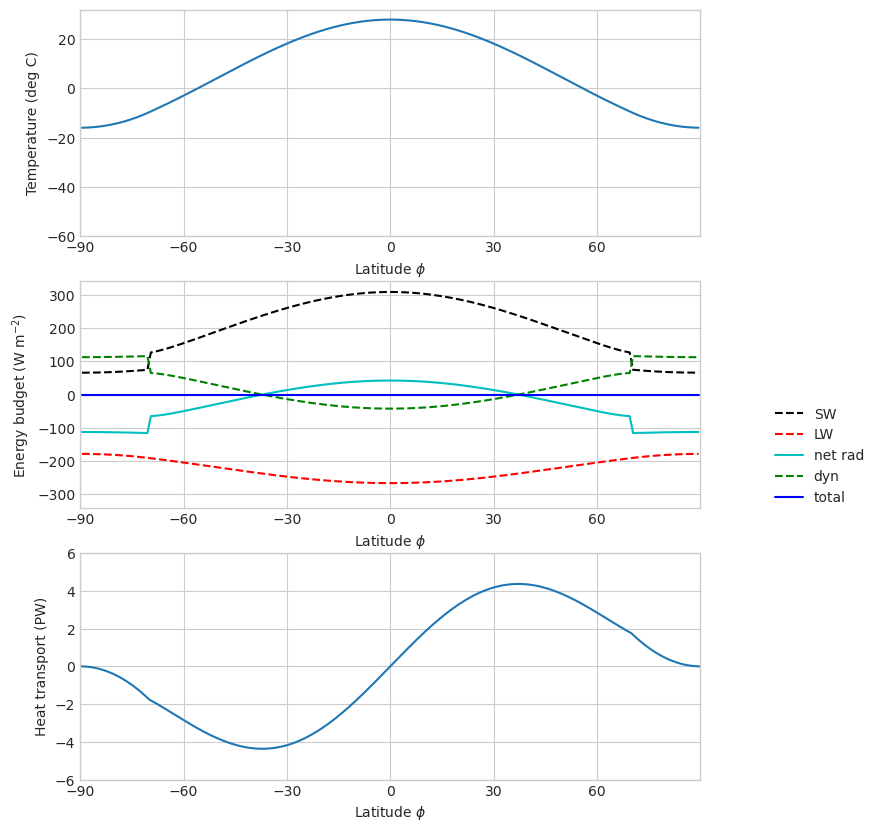

In [13]:
# Integrate out to equilibrium.
model1.integrate_years(5)
#  Check for energy balance
print(climlab.global_mean(model1.net_radiation))
f = ebm_plot(model1)

Notes:
SW is the shortwave radiation which is higher at the equator because it is more direct and lower at the poles because the sunlight is less direct. LW is longwave radiation which is greatest at the poles because they lose the most heat. The tropics and equator absorb a lot of solar radiation. The net radiation is SW - LW. Dyn is dynamics which is the convergence of the heat transport curve. It fights against the radiation, so it tries to warm the poles at cool the tropics. 


Diagnostic that tells us the latitude of the ice edge:

In [14]:
model1.icelat

array([-70.,  70.])

This model is tuned up to reasonable "present-day" conditions.

## Polar-amplified warming in the EBM
____________

Because the model doesn't have a notion of "atmospheric composition", the only way to simulate a CO2 increase, say, is to pass it a change in its OLR budget, which we do by tweaking the $A$ parameter (cf $OLR = A + B \times T$). The equivalent of doubling CO2 in this model is something like 

$$ A \rightarrow A - \delta A $$

where $\delta A = 4$ W m$^{-2}$.

In [15]:
model1.subprocess['LW'].A

210

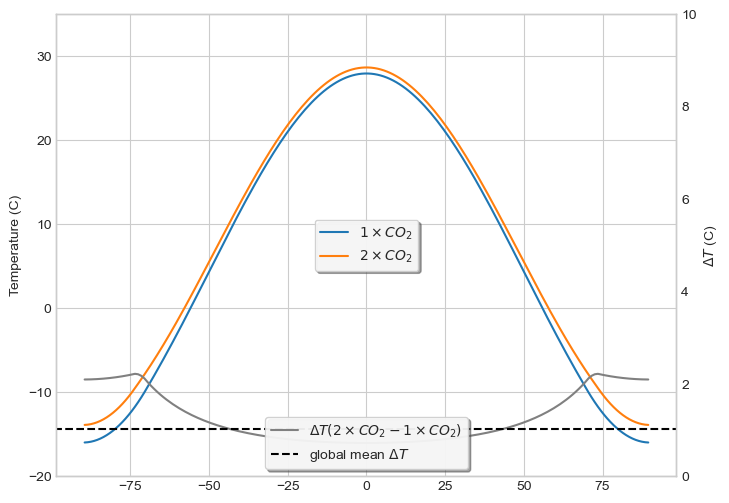

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')
deltaA = 1

#  This is a very handy way to "clone" an existing model:
model2 = climlab.process_like(model1)

#  Now change the longwave parameter:
model2.subprocess['LW'].A = param['A'] - deltaA
#  and integrate out to equilibrium again
model2.integrate_years(5, verbose=False)
plt.close('all')

fig, a1 = plt.subplots(1,1,figsize=(8,6))
a1.plot(model1.lat, model1.Ts, label=r'$1 \times CO_2$',zorder=2)
a1.plot(model2.lat, model2.Ts, label=r'$2 \times CO_2$',zorder=1)
a1.set_ylabel('Temperature (C)');
a2 = a1.twinx()
dT = model2.Ts-model1.Ts # extract temp difference
dTm = climlab.global_mean(dT)
a2.plot(model1.lat, dT, color = 'gray', zorder =0,
        label=r'$\Delta T (2 \times CO_2 - 1 \times CO_2)$')
a2.axhline(y=dTm,xmin=model1.lat.min(),xmax=model1.lat.max(),
           color = 'black',ls='--',label='global mean $\Delta T$')
a2.set_ylabel(r'$\Delta T$ (C)'); a1.set_ylim(-20,35)
a2.grid()
legend_1 = a1.legend(shadow=True,fancybox=True,framealpha=0.9,frameon=True,loc='center'); 
legend_1.remove()
a2.legend(shadow=True,fancybox=True,framealpha=0.9,frameon=True,loc='lower center')
a2.add_artist(legend_1)
a2.set_ylim(0,10)
fig.savefig("polar_amplification.png",dpi=300)
plt.show()

In [17]:
dT.max()/dT.min()

Field(3.08621171)

Also, the current ice conditions are:

In [18]:
ice_cond = (model2.icelat[1], model2.ice_area)
print("Ice latitude: {:3.2f}; Ice area: {:3.2f}".format(*ice_cond))

Ice latitude: 74.00; Ice area: 0.04


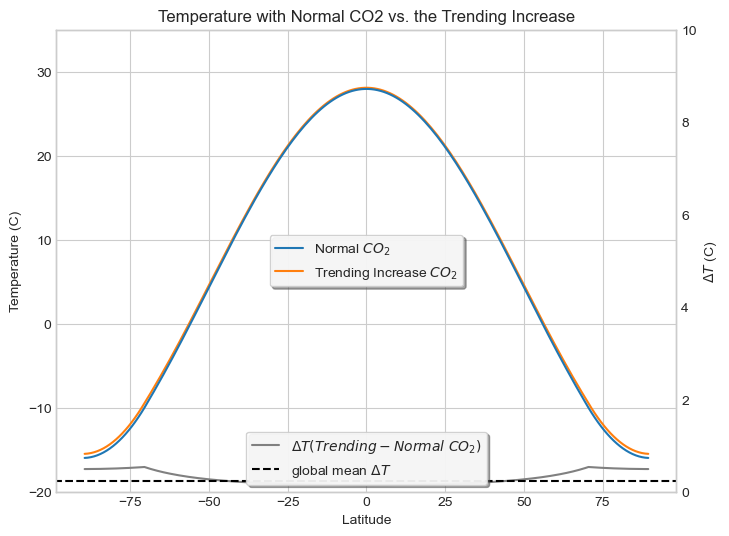

In [52]:
plt.style.use('seaborn-v0_8-whitegrid')
deltaA = 0.157

#  This is a very handy way to "clone" an existing model:
model3 = climlab.process_like(model1)

#  Now change the longwave parameter:
model3.subprocess['LW'].A = param['A'] - deltaA
#  and integrate out to equilibrium again
model3.integrate_years(5, verbose=False)
plt.close('all')

fig, a1 = plt.subplots(1,1,figsize=(8,6))
a1.plot(model1.lat, model1.Ts, label=r'Normal $CO_2$',zorder=2)
a1.plot(model3.lat, model3.Ts, label=r'Trending Increase $CO_2$',zorder=1)
a1.set_ylabel('Temperature (C)');
a1.set_xlabel('Latitude')
a2 = a1.twinx()
dT = model3.Ts-model1.Ts # extract temp difference
dTm = climlab.global_mean(dT)
a2.plot(model1.lat, dT, color = 'gray', zorder =0,
        label=r'$\Delta T (Trending - Normal\ CO_2)$')
a2.axhline(y=dTm,xmin=model1.lat.min(),xmax=model1.lat.max(),
           color = 'black',ls='--',label='global mean $\Delta T$')
a2.set_ylabel(r'$\Delta T$ (C)'); a1.set_ylim(-20,35)
a2.grid()
a1.set_title("Temperature with Normal CO2 vs. the Trending Increase")
legend_1 = a1.legend(shadow=True,fancybox=True,framealpha=0.9,frameon=True,loc='center'); 
legend_1.remove()
a2.legend(shadow=True,fancybox=True,framealpha=0.9,frameon=True,loc='lower center')
a2.add_artist(legend_1)
a2.set_ylim(0,10)
fig.savefig("polar_amplification.png",dpi=300)
plt.show()

In [53]:
dT.max()/dT.min()

Field(3.79899939)

In [54]:
ice_cond = (model3.icelat[1], model3.ice_area)
print("Ice latitude: {:3.2f}; Ice area: {:3.2f}".format(*ice_cond))

Ice latitude: 71.00; Ice area: 0.05


What would happen if this double this greenhouse warming (8 W. m$^{-2}$ instead of 4, a case we'll call "$3 \times CO_2$" though it is not strictly true)

In [37]:
model3 = climlab.process_like(model1)
model3.subprocess['LW'].A = param['A'] - 2*deltaA
model3.integrate_years(5, verbose=False) # integrate to equilibrium

Now let's plot these 3 EBM solutions on the same plot, together with the temperature difference between model 3 and model 2:

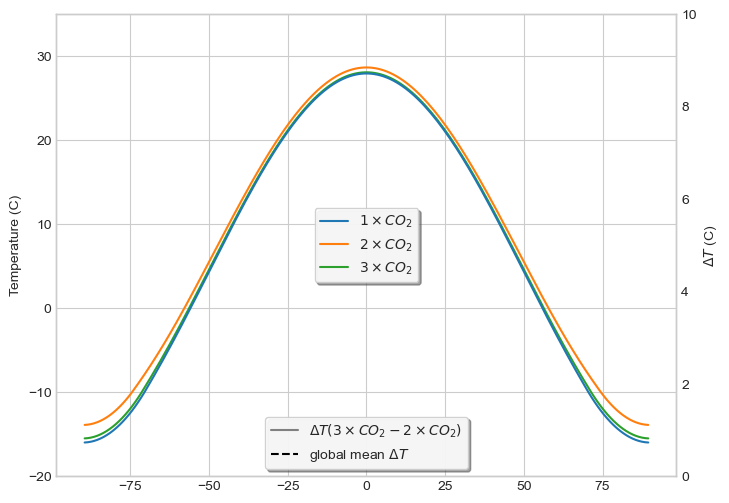

In [28]:
fig, a1 = plt.subplots(1,1,figsize=(8,6))
a1.plot(model1.lat, model1.Ts, label=r'$1 \times CO_2$',zorder=2)
a1.plot(model2.lat, model2.Ts, label=r'$2 \times CO_2$',zorder=1)
a1.plot(model3.lat, model3.Ts, label=r'$3 \times CO_2$',zorder=1)
a1.set_ylabel('Temperature (C)');
a2 = a1.twinx()
dT = model3.Ts-model2.Ts # extract temp difference
dTm = climlab.global_mean(dT)
a2.plot(model1.lat, dT, color = 'gray', zorder =0,
        label=r'$\Delta T (3 \times CO_2 - 2 \times CO_2)$')
a2.axhline(y=dTm,xmin=model1.lat.min(),xmax=model1.lat.max(),
           color = 'black',ls='--',label='global mean $\Delta T$')
a2.set_ylabel(r'$\Delta T$ (C)'); a1.set_ylim(-20,35)
a2.grid()
legend_1 = a1.legend(shadow=True,fancybox=True,framealpha=0.9,frameon=True,loc='center'); 
legend_1.remove()
a2.legend(shadow=True,fancybox=True,framealpha=0.9,frameon=True,loc='lower center')
a2.add_artist(legend_1)
a2.set_ylim(0,10)
plt.show()

In [20]:
ice_cond = (model3.icelat[0], model3.ice_area)
print("Ice latitude: {:3.2f}; Ice area: {:3.2f}".format(*ice_cond))

Ice latitude: -90.00; Ice area: 0.00


In [21]:
dT.max()/dT.min()

Field(1.00000019)

Historically EBMs have been used to study the climatic response to a change in the energy output from the Sun. We can do that easily with `climlab`. Let's first what the solar constant is in the model: 

In [22]:
m = climlab.EBM_annual(num_lat=180, **param)
#  The current (default) solar constant, corresponding to present-day conditions:
m.subprocess.insolation.S0

1365.2

###  What happens if the sun is dimmed?

In [23]:
m.integrate_years(10.) #  First, get to equilibrium
climlab.global_mean(m.net_radiation) #  Check for energy balance

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.999999999999863 years.


array(1.28158635e-05)

In [24]:
ice_cond = (m.icelat[0], m.ice_area)
print("Ice latitude: {:3.2f}; Ice area: {:3.2f}".format(*ice_cond))

Ice latitude: -70.00; Ice area: 0.06


In [25]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1300.

In [26]:
#  Integrate to new equilibrium
m.integrate_years(10.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 19.99999999999943 years.


array(-0.00013409)

In [27]:
ice_cond = (m.icelat[0], m.ice_area)
print("Ice latitude: {:3.2f}; Ice area: {:3.2f}".format(*ice_cond))

Ice latitude: -54.00; Ice area: 0.19


In [28]:
fig, ax1, ax2, ax3 = ebm_plot(m, return_fig=True)
fig.suptitle('EBM for $S_0 = $' + str(m.subprocess.insolation.S0),fontweight='bold')
ax3.axvline(x=m.icelat[0],color='gray',alpha=0.8,ls=':',label='ice edge')
ax3.axvline(x=m.icelat[1],color='gray',alpha=0.8,ls=':')
ax3.legend(loc='lower center')
fig.tight_layout()

Notes: 
The ice edge is at much lower latitudes (closer to the equator). The divergence of heat transports is trying to balance the shortwave radiatoin. The shortwave radiation changes at the edge of the ice because the ice has a high albedo. 

###  What happens if $S_0$ is decreased even more?


In [29]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1200.
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 24.99999999999979 years.


array(-5.13788963)

In [30]:
m.integrate_years(10.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 35.0000000000016 years.


array(-1.25838369e-06)

In [31]:
ebm_plot(m)

In [32]:
ice_cond = (m.icelat[0], m.ice_area)
print("Ice latitude: {:3.2f}; Ice area: {:3.2f}".format(*ice_cond))

Ice latitude: -0.00; Ice area: 1.00


Notes:
The ice covers the entire planet now. This is because the temperature is far below freezing (for water).

### Now what happens if $S_0$ is set back to its present-day value?

In [33]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1365.2
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 40.0000000000025 years.


array(0.00790051)

In [34]:
ebm_plot(m)

Notes:
The climate is not the same we started with because the planet was already covered in ice, so it has to be a lot warmer in order to get back to the old point. With the previous decrease in solar insolation, we fell of the branch of the bifurcation, so we need to increase solar insolation a lot to get to the other branch.

The solar insolation needs to reach 1840 in order to get out of snowball Earth. As soon as we reach this point it goes from all ice to no ice.

In [35]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 =  1840# set a value for the solar constant
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

m.integrate_years(10.)
m.icelat

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 45.0000000000034 years.
Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 55.000000000005215 years.


array([-90.,  90.])

In [36]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 =  1365.2# set a value for the solar constant
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

m.integrate_years(10.)
m.icelat

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 60.00000000000612 years.
Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 70.00000000000793 years.


array([-73.,  73.])

The ice edge in our model is always where the temperature crosses $T_f = -10^\circ$C. The system is at **equilibrium** when the temperature is such that there is a balance between ASR, OLR, and heat transport convergence everywhere. 

Recall that the Sun is a dynamic star that may get brighter or dimmer at different times (in fact it was significantly cooler during early Earth history). That would mean that the solar constant $S_0 = 4Q$ was larger or smaller. We should expect that the temperature (and thus the ice edge) should increase and decrease as we change $S_0$. 

____________

## Credits

This notebook is based on materials from [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.
____________